In [68]:
import torch
from torchvision import transforms
from PIL import Image

In [69]:
class AddGaussianNoise(object):
    def __init__(self, mean=0.0, std=1.0):
        self.mean = mean
        self.std = std

    def __call__(self, img):
        # Convert the image to a tensor
        img_tensor = transforms.ToTensor()(img)

        # Generate the noise tensor
        print(img_tensor.size())
        noise = torch.randn(img_tensor.size()) * self.std + self.mean

        # Add the noise to the image tensor
        img_tensor += noise

        # Clamp the image tensor to the range [0, 1]
        img_tensor = torch.clamp(img_tensor, 0, 1)

        # Convert the image tensor back to an image
        img = transforms.ToPILImage()(img_tensor)

        return img


In [70]:
img = Image.open("/home/juhyeon/Imagenet/val/n01484850/ILSVRC2012_val_00002338.JPEG")

In [71]:
transform = transforms.Compose([
    transforms.Resize(322),
    transforms.CenterCrop(224),
    AddGaussianNoise(mean=0.0, std=0.05),
])

torch.Size([3, 224, 224])


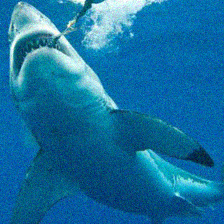

In [72]:
transform(img)